In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''
import random

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_paragraphs import IAMParagraphs
from text_recognizer.data.iam_synthetic_paragraphs import IAMSyntheticParagraphs
from text_recognizer.data.iam_extended_paragraphs import IAMExtendedParagraphs

/home/aktersnurra/.cache/pypoetry/virtualenvs/text-recognizer-ejNaVa9M-py3.9/lib/python3.9/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [54]:
def _plot(image, figsize=(12,12), title='', vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)

def convert_y_label_to_string(y, mapping, padding_index=3):
    return ''.join([mapping[i] for i in y if i != padding_index])

In [64]:
dataset = IAMExtendedParagraphs(batch_size=8, word_pieces=True)
dataset.prepare_data()
dataset.setup()
print(dataset)

2021-06-27 20:17:40.498 | DEBUG    | text_recognizer.data.mappings:_configure_wordpiece_processor:104 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb
2021-06-27 20:17:40.682 | DEBUG    | text_recognizer.data.mappings:_configure_wordpiece_processor:104 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb
2021-06-27 20:17:40.777 | INFO     | text_recognizer.data.iam_paragraphs:setup:111 - Loading IAM paragraph regions and lines for None...
2021-06-27 20:17:54.542 | DEBUG    | text_recognizer.data.mappings:_configure_wordpiece_processor:104 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb
2021-06-27 20:17:56.911 | DEBUG    | text_recognizer.data.mappings:_configure_wordpiece_processor:104 - Using data dir: /home/aktersnurra/projects/text-recognizer/data/downloaded/iam/iamdb
2021-06-27 20:17:57.147 | INFO     | text_recognizer.data.iam_synthetic_paragraphs:setup:75 - IAM Synthetic

IAM Original and Synthetic Paragraphs Dataset
Num classes: 1006
Dims: (1, 576, 640)
Output dims: (682, 1)
Train/val/test sizes: 19907, 262, 231
Train Batch x stats: (torch.Size([8, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0105), tensor(0.0575), tensor(1.))
Train Batch y stats: (torch.Size([8, 451]), torch.int64, tensor(1), tensor(1004))
Test Batch x stats: (torch.Size([8, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0315), tensor(0.0799), tensor(0.9098))
Test Batch y stats: (torch.Size([8, 451]), torch.int64, tensor(1), tensor(1003))



In [ ]:
dataset = IAMParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

In [75]:
x, y = next(iter(dataset.test_dataloader()))

In [76]:
x.shape

torch.Size([8, 1, 576, 640])

In [73]:
x, y = dataset.data_train[0]

In [74]:
x.shape

torch.Size([1, 576, 640])

In [78]:
y

tensor([[1000,   25,  147,  ..., 1002, 1002, 1002],
        [1000,    1,   37,  ..., 1002, 1002, 1002],
        [1000,    6,    1,  ..., 1002, 1002, 1002],
        ...,
        [1000,  126,   12,  ..., 1002, 1002, 1002],
        [1000,    1,   37,  ..., 1002, 1002, 1002],
        [1000,  116,  119,  ..., 1002, 1002, 1002]])

In [77]:
len(y)

8

In [59]:
y.shape

torch.Size([451])

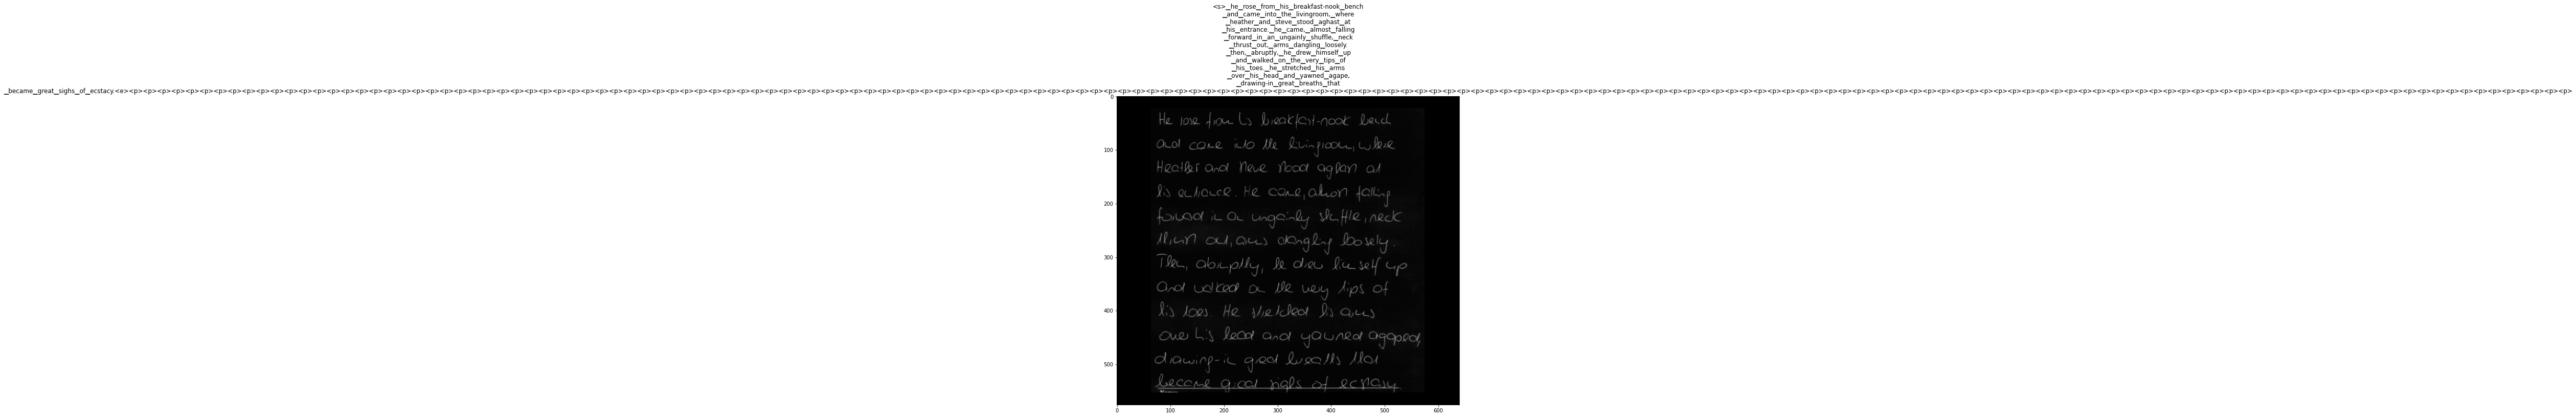

In [81]:
_plot(x[0, 0], vmax=1, title=dataset.mapping.get_text(y[0]))

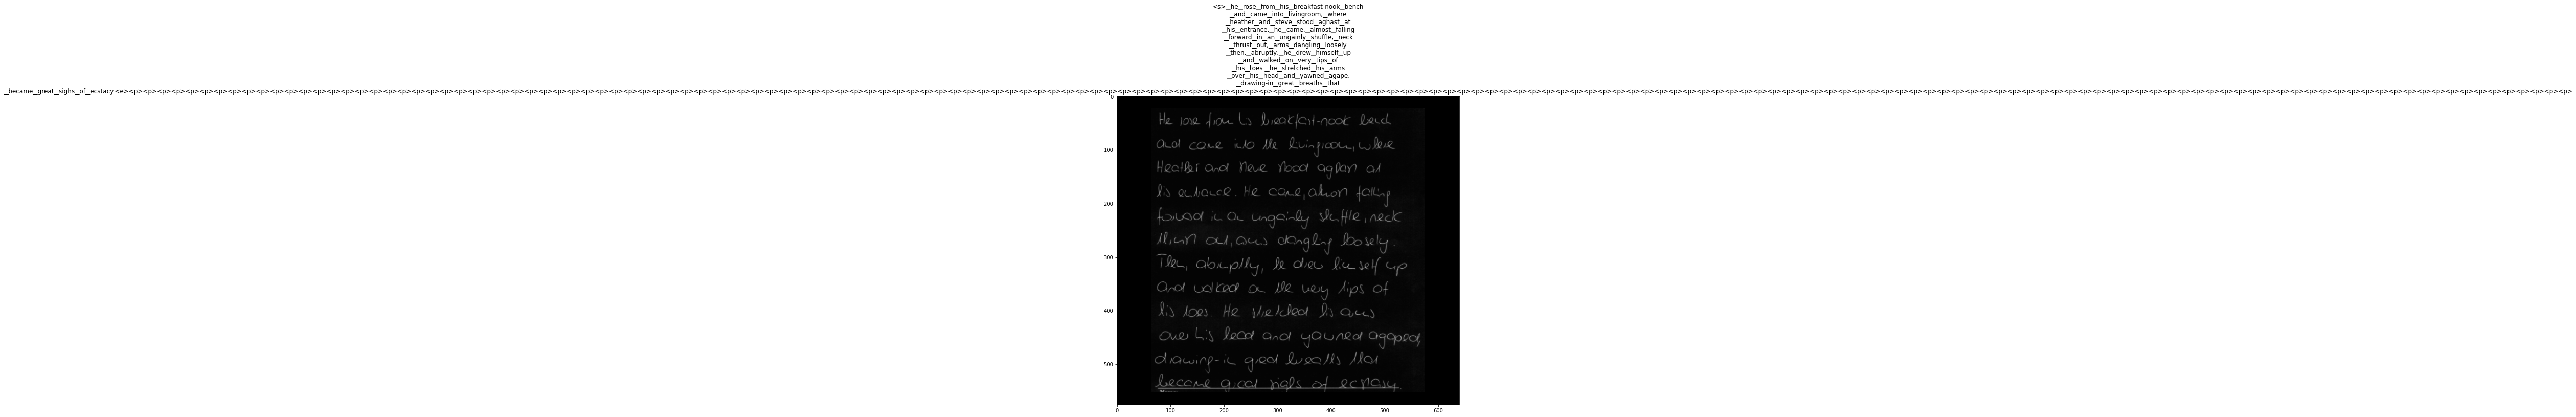

In [82]:
_plot(x[0, 0], vmax=1, title=convert_y_label_to_string(y[0], dataset.mapping))

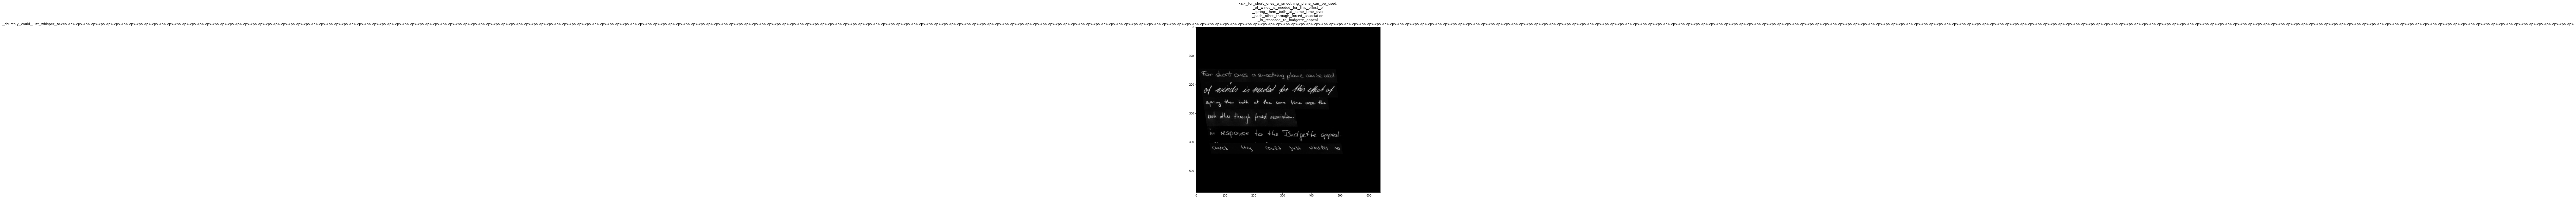

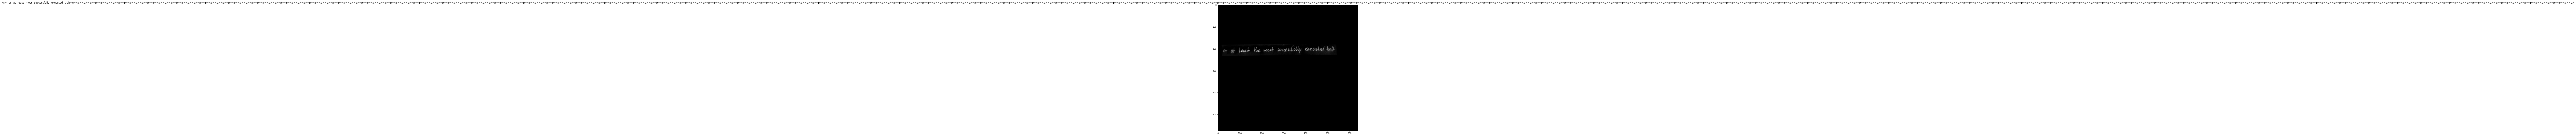

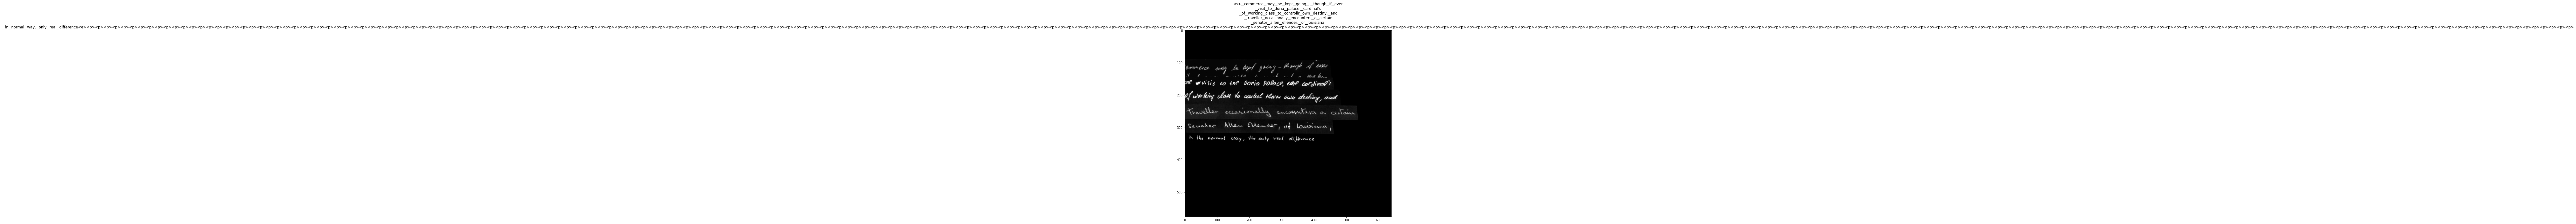

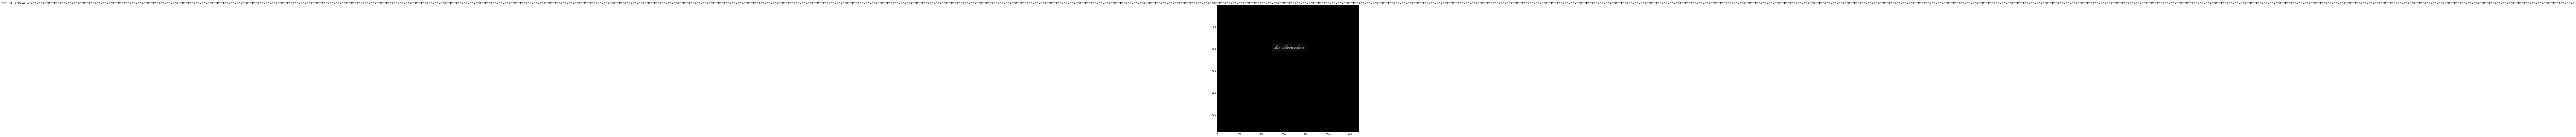

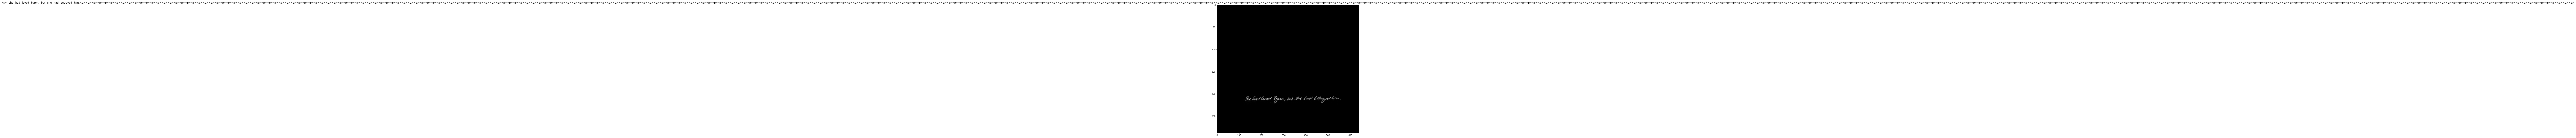

In [61]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [16]:
from einops import rearrange

In [17]:
x, y = dataset.data_train[2]

torch.Size([482])


In [ ]:
_plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
p = 32
patches = rearrange(x.unsqueeze(0), 'b c (h p1) (w p2) -> b c (h w) p1 p2', p1 = p, p2 = p)

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(15):
    ax = fig.add_subplot(1, 15, i + 1)
    ax.imshow(patches[0, 0, i + 160, :, :].squeeze(0), cmap='gray')

In [ ]:
# Testing

for _ in range(5):
    i = random.randint(0, len(dataset.data_test))
    x, y = dataset.data_test[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
dataset = IAMSyntheticParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

In [ ]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))